<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-DataSet" data-toc-modified-id="Read-DataSet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read DataSet</a></span></li><li><span><a href="#Matriz-de-Correlação-e-Visaulização-dos-Dados" data-toc-modified-id="Matriz-de-Correlação-e-Visaulização-dos-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matriz de Correlação e Visaulização dos Dados</a></span></li><li><span><a href="#Pré-processamento-e-Transformações" data-toc-modified-id="Pré-processamento-e-Transformações-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pré-processamento e Transformações</a></span></li><li><span><a href="#Normalização-Atributo-Idade-(Min--Max)" data-toc-modified-id="Normalização-Atributo-Idade-(Min--Max)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Normalização Atributo Idade (Min- Max)</a></span></li></ul></div>

In [5]:
# necessário instalar para ler em xlsx
pip install  xlrd 

  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


# Importando Librarys

In [162]:
import pandas as pd
import numpy as  np

#preprocessamento
from sklearn import preprocessing

#imagens
from IPython.display import Image as img


#bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Read DataSet

In [111]:
df_cesaria = pd.read_excel ('cesarianadataset.xlsx')

In [112]:
df_cesaria.head()


,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [113]:
df_cesaria = pd.DataFrame(df_cesaria)

## Matriz de Correlação e Visaulização dos Dados

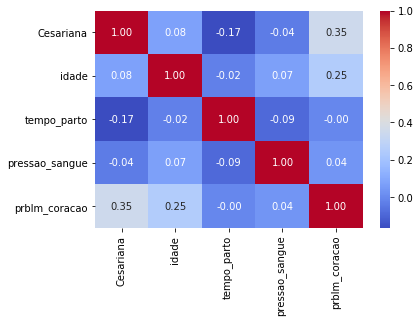

In [114]:
g = sns.heatmap(df_cesaria[["Cesariana","idade","tempo_parto","pressao_sangue","prblm_coracao"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

* Como esperado Cesariana x problema no coração tem correlação positiva Rázoavel
* Idade e Problema do Coração também possui certa relação

Portanto idade e problema do coração podem ser bons atributos para a  predição

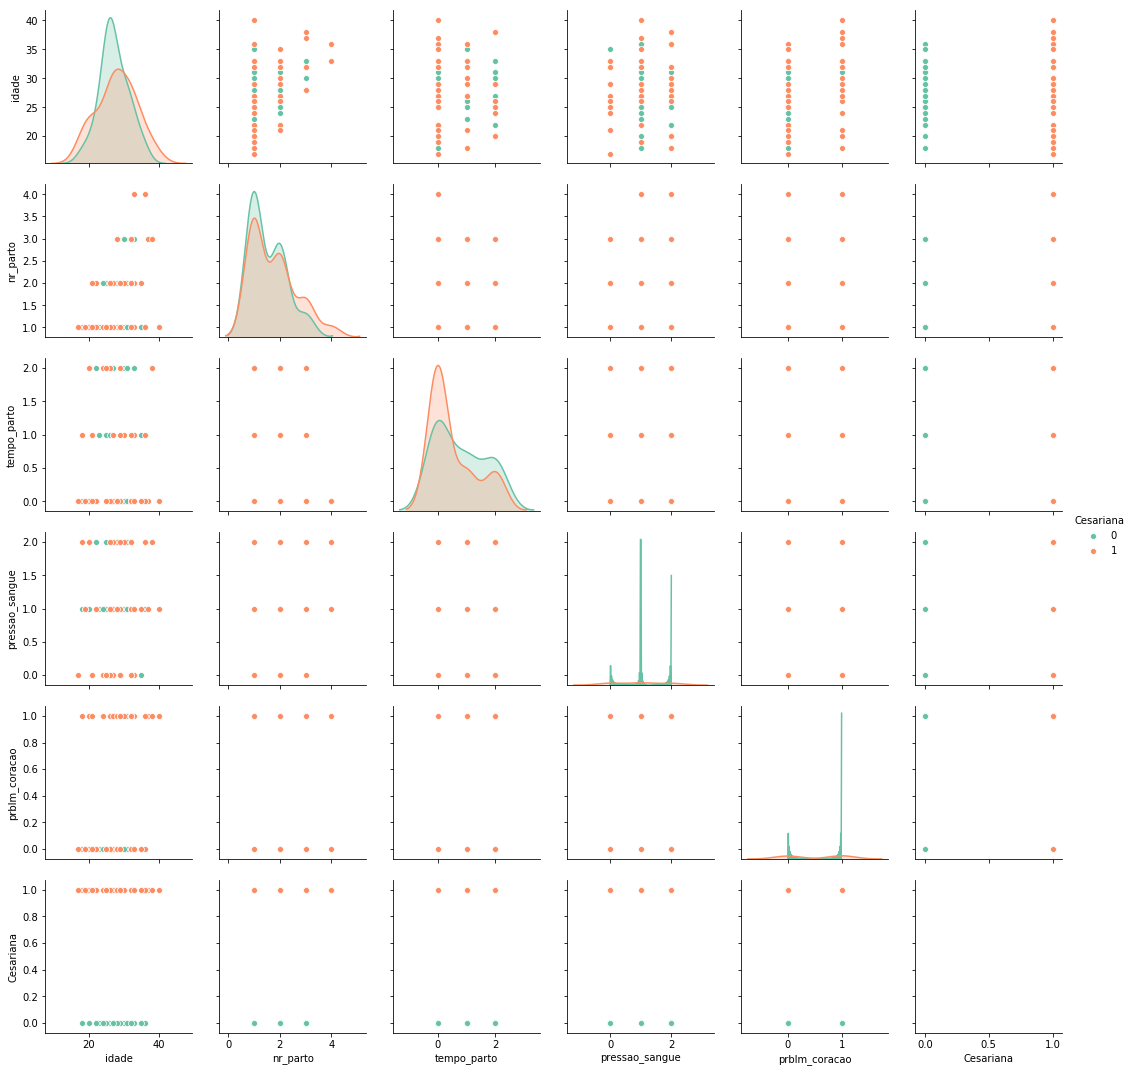

In [115]:
sns.pairplot(df_cesaria,hue="Cesariana",palette="Set2")
plt.show()

## Pré-processamento e Transformações

In [120]:
df_cesaria.loc[df_cesaria.prblm_coracao  ==  0,'Ft_prblm_coracao'] = 'Apto'

df_cesaria.loc[df_cesaria.prblm_coracao == 1,  'Ft_prblm_coracao']  = 'Inapto'

In [121]:

df_cesaria.loc[df_cesaria.pressao_sangue  ==  0,'Ft_pressao_sangue'] = 'Baixo'

df_cesaria.loc[df_cesaria.pressao_sangue == 1,  'Ft_pressao_sangue']  = 'Normal'

df_cesaria.loc[df_cesaria.pressao_sangue == 2,   'Ft_pressao_sangue']  = 'Alto'

In [122]:
df_cesaria.loc[df_cesaria.tempo_parto  ==  0,'Ft_tempo_parto'] = 'Pontual'

df_cesaria.loc[df_cesaria.tempo_parto == 1, 'Ft_tempo_parto']  = 'Prematuro'

df_cesaria.loc[df_cesaria.tempo_parto == 2, 'Ft_tempo_parto']  = 'Tardio'

In [130]:
df_cesaria.loc[df_cesaria.Cesariana  ==  0,'Clas_Cesariana']  = 'N'

df_cesaria.loc[df_cesaria.Cesariana   == 1, 'Clas_Cesariana']  = 'S'

In [131]:
df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Ft_prblm_coracao,Ft_pressao_sangue,Ft_tempo_parto,Clas_Cesariana
0,22,1,0,2,0,0,Apto,Alto,Pontual,N
1,26,2,0,1,0,1,Apto,Normal,Pontual,S
2,26,2,1,1,0,0,Apto,Normal,Prematuro,N
3,28,1,0,2,0,0,Apto,Alto,Pontual,N
4,22,2,0,1,0,1,Apto,Normal,Pontual,S


## Normalização Atributo Idade (Min- Max)

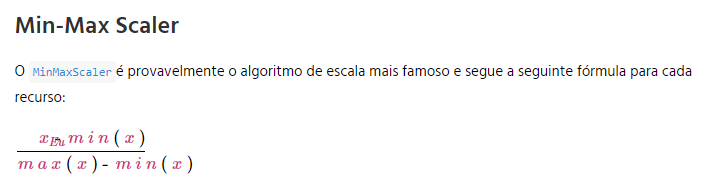

In [165]:
img('img/min_max.PNG')

In [155]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# fit and transform in one step
df_cesaria['Norm_idade'] = scaler.fit_transform(df_cesaria[['idade']])


df_cesaria.head()


,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Ft_prblm_coracao,Ft_pressao_sangue,Ft_tempo_parto,Clas_Cesariana,Norm_idade
0,22,1,0,2,0,0,Apto,Alto,Pontual,N,0.217391
1,26,2,0,1,0,1,Apto,Normal,Pontual,S,0.391304
2,26,2,1,1,0,0,Apto,Normal,Prematuro,N,0.391304
3,28,1,0,2,0,0,Apto,Alto,Pontual,N,0.478261
4,22,2,0,1,0,1,Apto,Normal,Pontual,S,0.217391


In [160]:
print(df_cesaria.Norm_idade.min())
print(df_cesaria.Norm_idade.max())


0.0
1.0


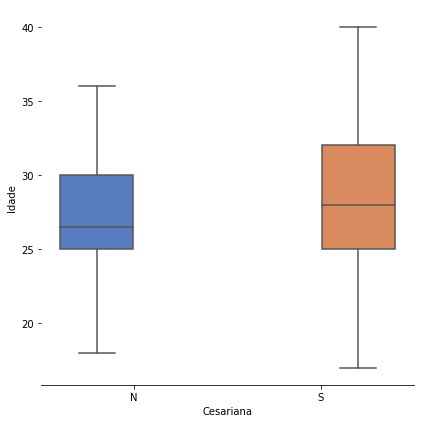

In [167]:
g = sns.factorplot(x="Clas_Cesariana",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("Cesariana")